In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('/Users/swarneil99/Downloads/NewspaperData.csv')

<AxesSubplot:xlabel='daily', ylabel='sunday'>

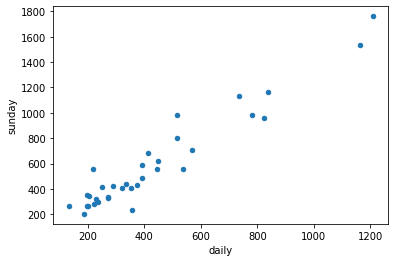

In [4]:
dataset.plot.scatter(x = 'daily', y = 'sunday')

# Correlation

In [5]:
dataset.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

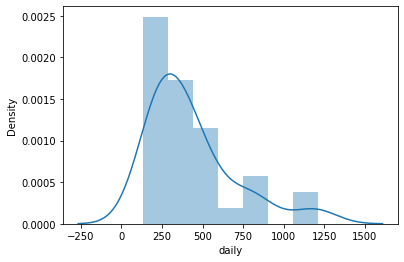

In [7]:
import seaborn as sns
sns.distplot(dataset['daily'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

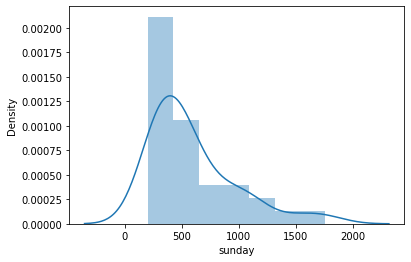

In [8]:
sns.distplot(dataset['sunday'])

## Fitting a linear regression model

In [9]:
import statsmodels.formula.api as smf
model = smf.ols('sunday~daily', data = dataset).fit()

<AxesSubplot:xlabel='daily', ylabel='sunday'>

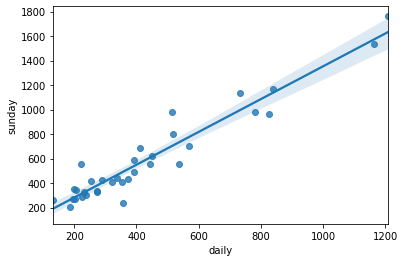

In [12]:
sns.regplot(x = 'daily', y = 'sunday', data = dataset)

In [13]:
# Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [14]:
# t and p-values 
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [15]:
# R squared values
model.rsquared, model.rsquared_adj

(0.9180596895873294, 0.9154990548869335)

r^2(Coeff of Determination) = 0.92 So the model is good enough 

# Predict for new data point

In [16]:
# Predict for 200 and 300 daily circulation 
newdata = pd.Series([200,300])

In [17]:
data_pred = pd.DataFrame(newdata, columns = ['daily'])

In [18]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

# Dataset 2

In [19]:
dataset2 = pd.read_csv('/Users/swarneil99/Downloads/WC_AT.csv')

In [20]:
dataset2.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [21]:
dataset2.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


Correlation is 0.81 positively 

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Waist', ylabel='Density'>

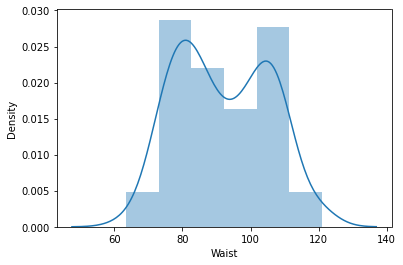

In [24]:
sns.distplot(dataset2['Waist'])

## Fitting a linear regression model

In [40]:
model2 = smf.ols('AT~Waist', data=dataset2).fit()

<AxesSubplot:xlabel='Waist', ylabel='AT'>

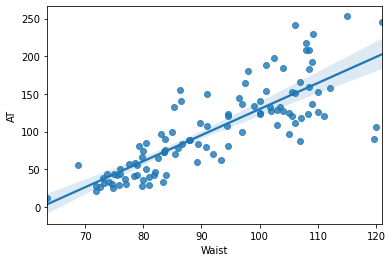

In [41]:
sns.regplot(x = 'Waist', y = 'AT', data=dataset2)

In [42]:
# Coefficients 
model2.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [43]:
newdata = pd.Series([80,90])

In [44]:
data_pred = pd.DataFrame(newdata, columns = ['Waist'])

In [46]:
model2.predict(data_pred)

0    60.727263
1    95.315857
dtype: float64

In [47]:
model2.rsquared, model2.rsquared_adj

(0.6700368930528429, 0.6669531256981966)